In [1]:
!pip install --user sklearn numpy pandas matplotlib

import numpy as np
import pandas as pd
import os
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import tensorflow as tf
print(tf.__version__)
from google.colab import files

1.13.1


In [0]:
#uploaded = files.upload()

In [0]:
BATCH_SIZE = 20
FEATURE_COUNT = 300
INPUT_SHAPE = FEATURE_COUNT

In [0]:
def get_data_training():   
#     files = os.listdir("../input")
#     filename = "../input/"+files[-1]
   # filename = os.getcwd()+"/train.csv"
    datadir = '/content'
    #print('Loading {} into panda.'.format(filename))
    training_df = pd.read_csv(os.path.join(datadir, 'train.csv'))
    
    for val in training_df['target'].unique():
        count = training_df.loc[training_df['target'] == val].shape[0]
        print('Label #{} has {} records'.format(val, count))
    
    x_train = training_df.iloc[:,2:].values
    y_train = training_df['target'].values
    return x_train, y_train


def get_data_testing():    
#     files = os.listdir("../input")
#     filename = "../input/"+files[-1]
    datadir = '/content'
   # print('Loading {} into panda.'.format(filename))
    #training_df = pd.read_csv(filename)
    training_df = pd.read_csv(os.path.join(datadir, 'test.csv'))

    x_test = training_df.iloc[:,1:].values
    return x_test


x_train, y_train = get_data_training()
x_test = get_data_testing()

# scall all data - a look ahead because they didn't say we couldnt
merged_x = np.concatenate((x_train, x_test))

scaler = MinMaxScaler()
# scaler = StandardScaler()

scaler.fit(merged_x)
# scaler.fit(x_train)

x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

Label #1.0 has 160 records
Label #0.0 has 90 records


In [0]:
print('x_train.shape() = {}'.format(x_train.shape))
print('x_train.min() = {}'.format(x_train.min()))
print('x_train.max() = {}'.format(x_train.max()))

print('y_train.min() = {}'.format(y_train.min()))
print('y_train.max() = {}'.format(y_train.max()))

print()

print('x_test.shape() = {}'.format(x_test.shape))
print('x_test.min() = {}'.format(x_test.min()))
print('x_test.max() = {}'.format(x_test.max()))

x_train.shape() = (250, 300)
x_train.min() = 0.0
x_train.max() = 1.0
y_train.min() = 0.0
y_train.max() = 1.0

x_test.shape() = (19750, 300)
x_test.min() = 0.0
x_test.max() = 1.0000000000000002


In [0]:
# def create_model_binary():
#     model = tf.keras.Sequential([
#         tf.keras.layers.Dense(256, input_dim=INPUT_SHAPE, activation=tf.nn.relu),
#         tf.keras.layers.Dense(128, activation=tf.nn.relu),
#         tf.keras.layers.Dense(64, activation=tf.nn.relu),
#         tf.keras.layers.Dense(32, activation=tf.nn.relu),
#         tf.keras.layers.Dense(1, activation=tf.nn.sigmoid)
#     ])
#     model.compile(optimizer='rmsprop', 
#                   loss='binary_crossentropy',
#                   metrics=['accuracy'])
#     model.summary()
#     return model

# 
def create_model():
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(300, input_dim=INPUT_SHAPE, activation=tf.nn.relu, name='layer_1'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dense(300, activation=tf.nn.relu, name='layer_2'),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(150, activation=tf.nn.relu, name='layer_3'),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(75, activation=tf.nn.relu, name='layer_4'),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(33, activation=tf.nn.relu, name='layer_5'),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(2, activation=tf.nn.softmax, name='output_layer')
    ])
    model.compile(optimizer='rmsprop', 
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    model.summary()
    return model




In [0]:
from sklearn.metrics import roc_auc_score

class Histories(tf.keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.aucs = []
        self.losses = []

    def on_train_end(self, logs={}):
#         print('done training.')
        return

    def on_epoch_begin(self, epoch, logs={}):
        return

#     def on_epoch_end(self, epoch, logs={}):
#         self.losses.append(logs.get('loss'))
#         y_pred = self.model.predict(self.validation_data[0])
#         self.aucs.append(roc_auc_score(self.validation_data[1], y_pred))
#         return

    def on_batch_begin(self, batch, logs={}):
        return

    def on_batch_end(self, batch, logs={}):
        return

    
histories = Histories()    

In [0]:
def get_shuffled_data(X, y):
    random = np.random.randint(low=1, high=100, size=1)[0]
    X_train, X_test, Y_train, Y_test = train_test_split(X, y, 
                    test_size=0.33, random_state=random, shuffle=True)
    
#     one_hot_labels = tf.keras.utils.to_categorical(labels, num_classes=10)
    Y_train = tf.keras.utils.to_categorical(Y_train, num_classes=2)
    Y_test = tf.keras.utils.to_categorical(Y_test, num_classes=2)
    return X_train, X_test, Y_train, Y_test
    

def get_shuffled_data_binary(X, y):
    random = np.random.randint(low=1, high=100, size=1)[0]
    return train_test_split(X, y, test_size=0.33, random_state=random, shuffle=True)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
layer_1 (Dense)              (None, 300)               90300     
_________________________________________________________________
batch_normalization_v1 (Batc (None, 300)               1200      
_________________________________________________________________
layer_2 (Dense)              (None, 300)               90300     
_________________________________________________________________
dropout (Dropout)            (None, 300)               0         
_________________________________________________________________
layer_3 (Dense)              (None, 150)               45150     
_________________________________________________________________
dropout_1 (Dropout)  

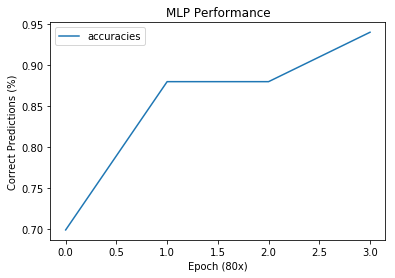

In [0]:
model = create_model()

accuracies = []
for i in range(4):
    X_train, X_test, Y_train, Y_test = get_shuffled_data(x_train, y_train)
    model.fit(X_train, Y_train,
              batch_size=BATCH_SIZE, 
              epochs=80,
              verbose=0,
              shuffle=True,
#               validation_data=(X_test, Y_test),
              callbacks=[histories])
    score = model.evaluate(X_test, Y_test, verbose=0)
    accuracies.append(score[1])
    
print('**********************')
print('Test score:', score[0])
print('Test accuracy:', score[1])


plt.plot(accuracies, label='accuracies')
plt.title('MLP Performance')
plt.xlabel('Epoch (80x)')
plt.ylabel('Correct Predictions (%)')
plt.legend()
plt.show()

In [0]:
predictions = model.predict_classes(x_test)

In [0]:
predictions_export = pd.DataFrame()
predictions_export['id'] = list(range(250, len(predictions) + 250))
predictions_export['target'] = predictions

for val  in predictions_export['target'].unique():
    count = predictions_export.loc[predictions_export['target'] == val].shape[0]
    print('val #{} count = {}'.format(val, count))

val #0 count = 9294
val #1 count = 10456


In [0]:
predictions_export.to_csv('predictions_export.csv', index=False)

In [0]:
files.download('predictions_export.csv') 


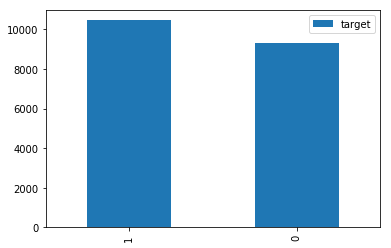

In [0]:
datadir = '/content'
Sub_df = pd.read_csv(os.path.join(datadir, 'predictions_export.csv'))
Sub_df['target'].value_counts().to_frame().plot.bar()